In [2]:
import os
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import networkx as nx

Random Graph generator

In [10]:
def randgp (n, p):
    G = nx.Graph()
    G.add_nodes_from(range(0,n))
    
    for i in xrange(0,n):
        for j in xrange(i+1,n):
            if rnd.random() <= p:
                G.add_edge(i,j)
        
    return G

Generate $N = 100$ graphs with $n$ and $p$, s.t. $np = 1$

In [53]:
N = 100
n = rnd.randint(500, 1500, N)
p = [1/float(k) for k in n]
G=[nx.Graph()]*N
for i in range(N):
    G[i]=randgp(n[i],p[i])

Draw a degree distribution for them

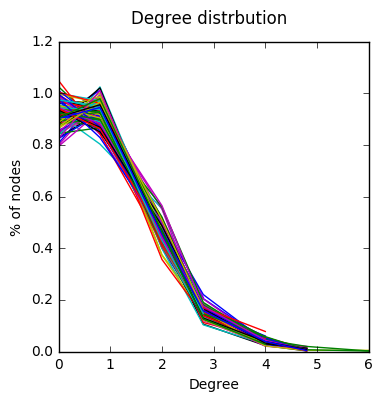

In [70]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, figsize=(4,4))
fig.suptitle('Degree distrbution', fontsize=12)  
ax.set_ylabel('% of nodes')
ax.set_xlabel('Degree')

for i in range(N):
    k = G[i].degree().values()
    bins1 = np.arange(min(k),max(k),0.4)
    hist1, bins1 = np.histogram(k, bins=bins1, normed = 1)
    nonzeroind = np.nonzero(hist1) 
    hist = hist1[nonzeroind]
    bins = bins1[nonzeroind]
    plt.plot(bins,hist,'-')
plt.show()

We know the estimation of parameter $\lambda$ from MLE, which is $\widehat{\lambda_{MLE}} = \frac{1}{n}\sum\limits_{i=1}^n{k_i}$

In [73]:
lm = [0]*N
for i in range(N):
    k = G[i].degree().values()
    lm[i]=np.mean(k)

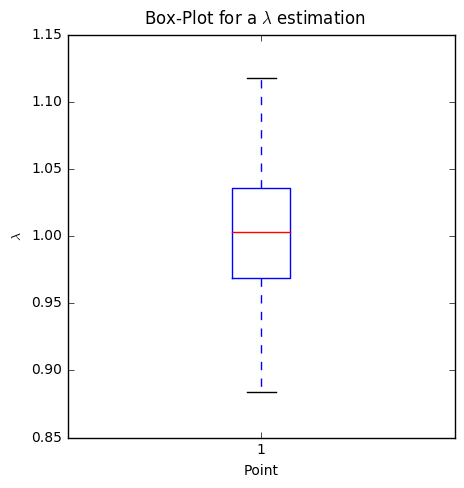

In [75]:
plt.close('all')

fig, ax = plt.subplots(nrows=1, figsize=(5,5))
fig.suptitle('Box-Plot for a $\lambda$ estimation', fontsize=12)  

ax.set_ylabel('$\lambda$')
ax.set_xlabel('Point')

plt.boxplot(lm)
fig.subplots_adjust(top=0.93)
plt.show()

Great! As $\lambda = np = 1$ we get the right estimation.

Here we generate  $N=100$  graphs with  $n$ and $p$ , s.t.  $np\rightarrow\infty$

In [80]:
N = 5
n = rnd.randint(10000, 20000, N)
p=[0]*N
for i in range(N):
    p[i] = 1/float(rnd.randint(200, 2000, 1))
G1=[nx.Graph()]*N
for i in range(N):
    G1[i]=randgp(n[i],p[i])

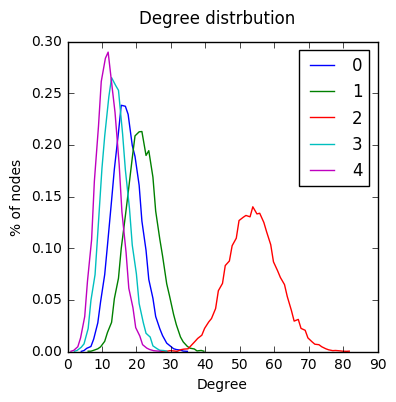

In [150]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, figsize=(4,4))
fig.suptitle('Degree distrbution', fontsize=12)  
ax.set_ylabel('% of nodes')
ax.set_xlabel('Degree')

for i in range(N):
    k = G1[i].degree().values()
    bins1 = np.arange(min(k),max(k),0.4)
    hist1, bins1 = np.histogram(k, bins=bins1, normed = 1)
    nonzeroind = np.nonzero(hist1) 
    hist = hist1[nonzeroind]
    bins = bins1[nonzeroind]
    plt.plot(bins,hist,'-', label = '%s'%i)
plt.legend()    
plt.show()

To estimate parameters $\mu$ and $\sigma^2$ of Gaussian distribution we use Kolmagorov-Smirtnov test, i.e. we calculate real CDF function based on our data, then we range different parameters of $\mu$ and $\sigma$ for model distribution and use Kolmagorov-Smirnov test
$$D=max_{x}{| F(x | \mu,\sigma)-F_{gaussian}(x) |}$$ and $\mu$, $\sigma = argmin_{\mu,\sigma}{D}$

For graph 0 mu =  18.4 sigma =  4.2
For graph 1 mu =  22.9 sigma =  4.7
For graph 2 mu =  54.9 sigma =  7.3
For graph 3 mu =  14.9 sigma =  3.7
For graph 4 mu =  12.9 sigma =  3.5


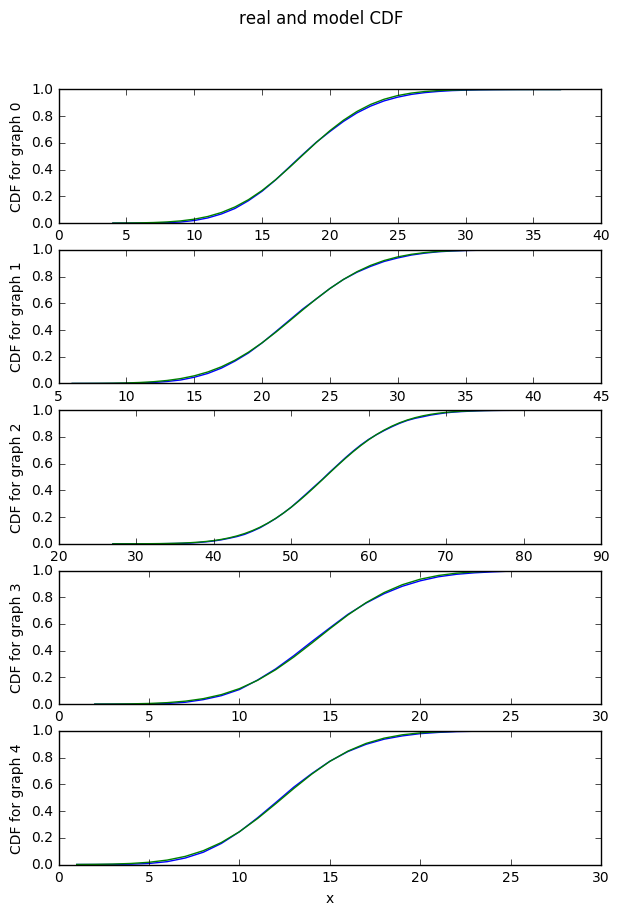

In [152]:
from scipy.stats import norm
fig, ax = plt.subplots(nrows=N, figsize=(7,10))
for g in range(N):
    
    #realCDF
    k = G1[g].degree()
    x=k.values();
    x=np.sort(x)
    xx=np.arange(min(x),max(x)+1,1)
    bins = np.arange(min(x)-1,max(x)+1, 1)
    hist, bins = np.histogram(x, bins=bins, density =1)
    realCDF=np.cumsum(hist)
    
    minD=2
    indM=0
    indS=0
    k = G1[g].degree().values()
    x=np.arange(min(k),max(k)+1,1)
    mu=np.arange(min(k),max(k),0.1)
    sigma=np.arange(0.1, max(k),0.1)
    i=0
    for m in mu: #enumerate all xmin
        j=0
        for s in sigma:
            pdf = norm.pdf(x, m, s)
            cdf = np.cumsum(pdf)

            #kolmagorov-smirnov test
            D=max(np.absolute(cdf-realCDF))
            if(D<=minD):
                minD=D
                indM=i
                indS=j
            j+=1
        i+=1
    print "For graph", g, "mu = ", mu[indM], "sigma = ", sigma[indS]
    pdf = norm.pdf(x,mu[indM], sigma[indS])
    cdf = np.cumsum(pdf)
    ax[g].set_ylabel('CDF for graph %s' %(g))
    ax[g].set_xlabel('x')
    fig.suptitle('real and model CDF', fontsize=12)  
    ax[g].plot(x, realCDF)
    ax[g].plot(x, cdf)
plt.show()

Part 2

Degree destribution in Erdos model is $$P(x = k) = C_n^k p^k (1-p)^{n-k}$$

1) If $\lambda = np = const$ then
$$ lim_{n\to\infty} {C_n^k p^k (1-p)^{n-k}} = lim_{n\to\infty} {\frac{n!}{k!(n-k)!} \frac{\lambda^k}{n^k}(1-\frac{\lambda}{n})^{n-k} } = \frac{\lambda^k}{k!} lim_{n\to\infty} {\frac{n!(1-\frac{\lambda}{n})^{n-k}}{(n-k)!{n^k}}} = \frac{\lambda^k}{k!} lim_{n\to\infty} {\frac{n(n-1)(n-2)...(n-k+1)}{n^k(1-\frac{\lambda}{n})^{k}} (1-\frac{\lambda}{n})^{n}} = \frac{\lambda^k}{k!} lim_{n\to\infty}{(1-\frac{\lambda}{n})^{n}} =e^{-\lambda}\frac{\lambda^k}{k!}  $$

Hence, we get Poisson distribution

2) If $\lambda = np \rightarrow \infty$, $p$ is fixed, $n\rightarrow \infty$ 

We use here Stirling's approximation: $n!\approx\sqrt{2\pi n}(\frac{n}{e})^n$

Hence, $$C_n^k p^k (1-p)^{n-k} \approx \frac{\sqrt{2\pi n}(\frac{n}{e})^n}{\sqrt{2\pi k}(\frac{k}{e})^k\sqrt{2\pi (n-k)}(\frac{n-k}{e})^{n-k}}  p^k (1-p)^{n-k} 
= \frac{1}{\sqrt{2\pi}} \sqrt{\frac{n}{k(n-k)}} \frac{n^n}{k^k(n-k)^{n-k}}  p^k (1-p)^{n-k}
= \frac{1}{\sqrt{2\pi n}} (\frac{k}{n})^{-k-\frac{1}{2}} (\frac{n-k}{n})^{-n+k-\frac{1}{2}}  p^k (1-p)^{n-k}
= \frac{1}{\sqrt{2\pi n}} \exp\{ -(k+\frac{1}{2})\ln{\frac{k}{n}} - (n-k+\frac{1}{2})\ln(\frac{n-k}{n})+k\ln{p} +(n-k)\ln(1-p)\}
=\{k = x+np\ and\ Taylor\ series\} \approx \frac{1}{\sqrt{2\pi n p(1-p)}} \exp\{ -\frac{x^2}{2np(1-p)}\}$$

We derive a Gaussian distribution for $x+np \sim N(0,np(1-p)) \Rightarrow x \sim N(np,np(1-p))$